In [2]:
'''Data Set Information:
%%  
%%  Data were extracted from images that were taken from genuine and forged 
%%  banknote-like specimens. For digitization, an industrial camera usually 
%%  used for print inspection was used. The final images have 400x 400 pixels. 
%%  Due to the object lens and distance to the investigated object gray-scale 
%%  pictures with a resolution of about 660 dpi were gained. Wavelet Transform 
%%  tool were used to extract features from images.
%%  
%%  
%%  Attribute Information:
%%  
%%  1. variance of Wavelet Transformed image (continuous) 
%%  2. skewness of Wavelet Transformed image (continuous) 
%%  3. curtosis of Wavelet Transformed image (continuous) 
%%  4. entropy of image (continuous) 
%%  5. class (integer) 

@relation banknote-authentication

@attribute V1 numeric
@attribute V2 numeric
@attribute V3 numeric
@attribute V4 numeric
@attribute Class {1,2}'''

'Data Set Information:\n%%  \n%%  Data were extracted from images that were taken from genuine and forged \n%%  banknote-like specimens. For digitization, an industrial camera usually \n%%  used for print inspection was used. The final images have 400x 400 pixels. \n%%  Due to the object lens and distance to the investigated object gray-scale \n%%  pictures with a resolution of about 660 dpi were gained. Wavelet Transform \n%%  tool were used to extract features from images.\n%%  \n%%  \n%%  Attribute Information:\n%%  \n%%  1. variance of Wavelet Transformed image (continuous) \n%%  2. skewness of Wavelet Transformed image (continuous) \n%%  3. curtosis of Wavelet Transformed image (continuous) \n%%  4. entropy of image (continuous) \n%%  5. class (integer) \n\n@relation banknote-authentication\n\n@attribute V1 numeric\n@attribute V2 numeric\n@attribute V3 numeric\n@attribute V4 numeric\n@attribute Class {1,2}'

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.cluster import KMeans as km
import numpy as np

In [15]:
data = pd.read_csv('original_banknote.csv')
v1=data['V1']
v2=data['V2']
classify=data['Class']

data_set=np.column_stack((v1,v2))

mean=np.mean(data_set,0)
sd=np.std(data_set,0)

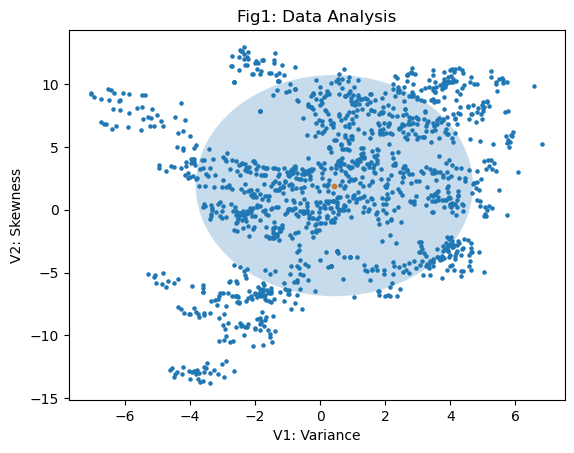

In [5]:
#plotting data to check outliers
ellipse=patches.Ellipse(mean,sd[0]*3,sd[1]*3,alpha=0.25)
fig,graph=plt.subplots()

plt.xlabel('V1: Variance')
plt.ylabel('V2: Skewness')
plt.title('Fig1: Data Analysis')
graph.scatter(v1,v2,s=5)
graph.scatter(mean[0],mean[1],s=10)
graph.add_patch(ellipse)

In [12]:
#normalization of dataset
mini=np.min(data_set,0)
maxi=np.max(data_set,0)
normal=(data_set-mini)/(maxi-mini)
mean_normal=np.mean(normal,0)
sd_normal=np.std(normal,0)
print(mean_normal)
print(sd_normal)

[0.53911366 0.58730138]
[0.20492874 0.21953128]


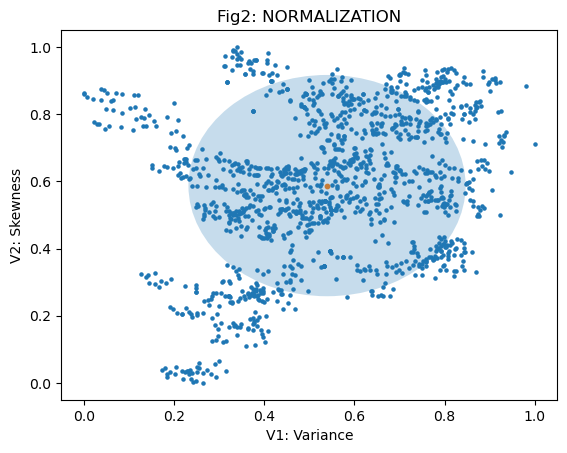

In [7]:
#normalized data visualization
ellipse_2=patches.Ellipse(mean_normal,sd_normal[0]*3,sd_normal[1]*3,alpha=0.25)
fig,graph=plt.subplots()

plt.xlabel('V1: Variance')
plt.ylabel('V2: Skewness')
plt.title('Fig2: NORMALIZATION')
graph.scatter(normal[:,0],normal[:,1],s=5)
graph.scatter(mean_normal[0],mean_normal[1],s=10)
graph.add_patch(ellipse_2)


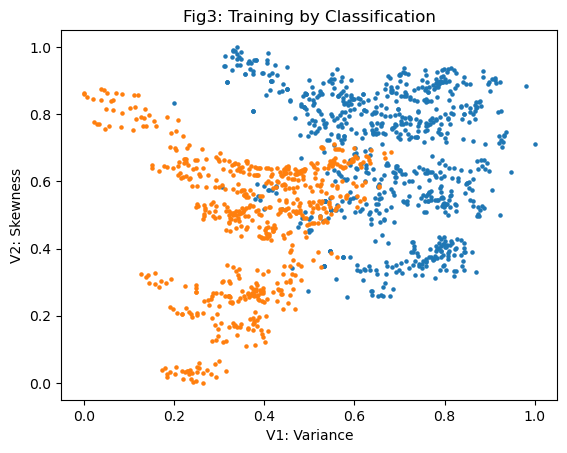

In [8]:
#Testing the model by classification
fig,g=plt.subplots()

filter1=data['Class']==1
filter2=data['Class']==2
real= normal[filter1]
fake= normal[filter2]

plt.xlabel('V1: Variance')
plt.ylabel('V2: Skewness')
plt.title('Fig3: Training by Classification')

g.scatter(real[:,0],real[:,1],s=5)
g.scatter(fake[:,0],fake[:,1],s=5)

c:\Users\manis\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\manis\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


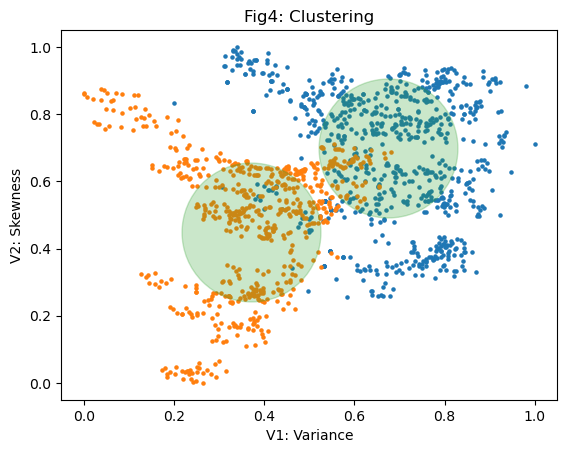

In [9]:
fig,g=plt.subplots()

filter1=data['Class']==1
filter2=data['Class']==2
real= normal[filter1]
fake= normal[filter2]

plt.xlabel('V1: Variance')
plt.ylabel('V2: Skewness')
plt.title('Fig4: Clustering')

g.scatter(real[:,0],real[:,1],s=5)
g.scatter(fake[:,0],fake[:,1],s=5)

result=km(n_clusters=2).fit(normal)
centers=result.cluster_centers_

g.scatter(centers[:,0],centers[:,1],s=10000,alpha=0.25)